<a href="https://colab.research.google.com/github/VaishaliMishra8/HeartDisease_Dataset/blob/main/LR_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Import required libraries
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.svm import SVC
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
url = 'https://raw.githubusercontent.com/VaishaliMishra8/asdfgj/main/heart_data.csv'
heart = pd.read_csv(url)  # Automatically detects comma separator
display(heart)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
 # Load your data (assuming 'heart' is already loaded)
 X = heart.drop("cardio", axis=1)
 y = heart["cardio"]
 # Train-test split
 X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
 )
 # Feature scaling
 scaler = StandardScaler()
 X_train_scaled = scaler.fit_transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 Train the LR Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Add stronger regularization to reduce overfitting (C < 1)
lr_model = LogisticRegression(C=0.1, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000)

Accuracy & Classification Report

In [ ]:
 from sklearn.metrics import accuracy_score, classification_report
 y_pred_lr = lr_model.predict(X_test_scaled)
 print("Accuracy:", accuracy_score(y_test, y_pred_lr))
 print(classification_report(y_test, y_pred_lr))

Accuracy: 0.7104285714285714
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



Confusion Matrix

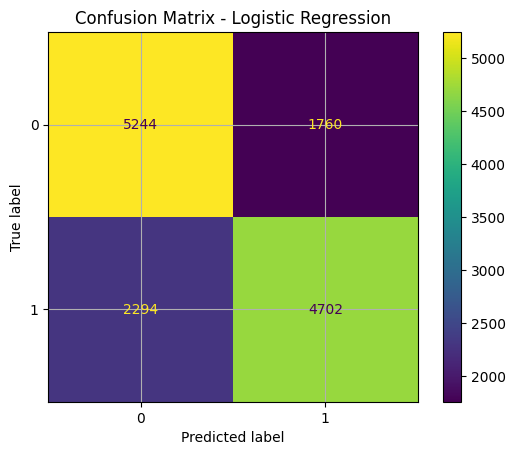

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.grid()
plt.show()

ROC Curve

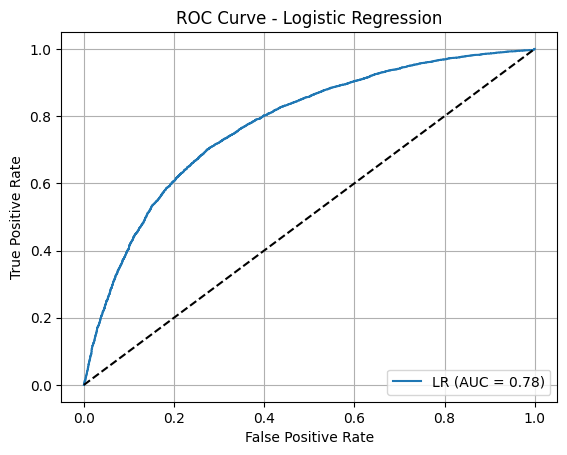

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="LR (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

. Train vs Validation Accuracy Curve

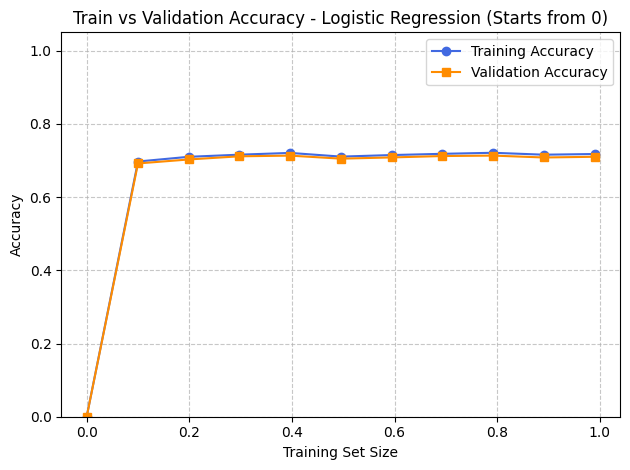

In [ ]:
#Step 1: Insert 0 into the training sizes
train_sizes = np.linspace(0.1, 0.99, 10)
train_sizes = np.insert(train_sizes, 0, 0.0)
train_scores = [0.0]  # Step 2: Add fake 0% accuracy at the beginning
val_scores = [0.0]
# Step 3: Loop through actual training sizes (skipping 0.0)
for frac in train_sizes[1:]:
  X_part, _, y_part, _ = train_test_split(X_train_scaled, y_train, train_size=frac, random_state=42)
  model = LogisticRegression(C=0.1, max_iter=1000)
  model.fit(X_part, y_part)
  train_scores.append(model.score(X_part, y_part))
  val_scores.append(model.score(X_test_scaled, y_test))
# Plotting
plt.plot(train_sizes, train_scores, marker='o', label='Training Accuracy', color='royalblue')
plt.plot(train_sizes, val_scores, marker='s', label='Validation Accuracy', color='darkorange')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy - Logistic Regression (Starts from 0)")
plt.ylim(0.0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

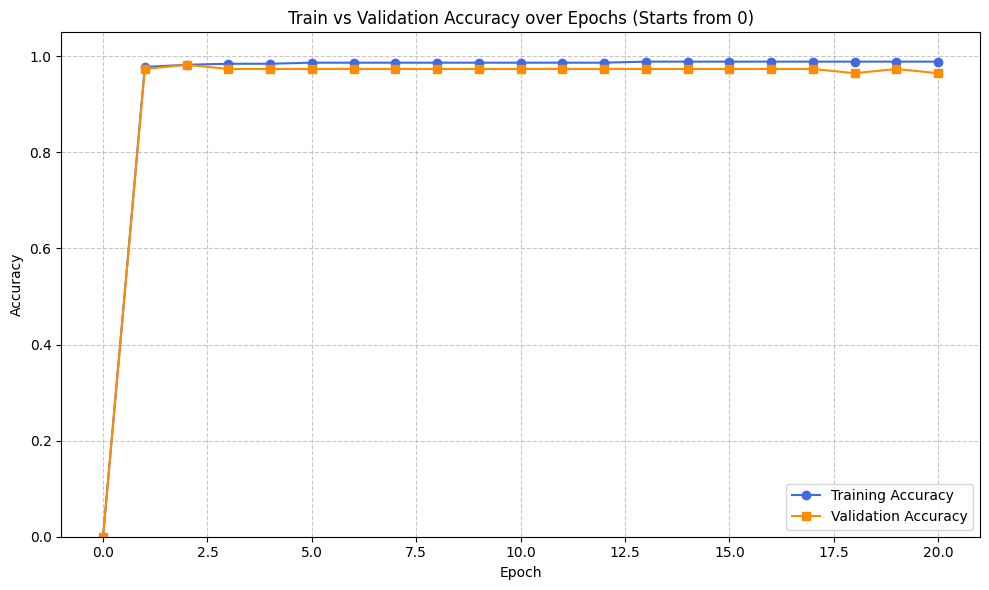

In [ ]:
 from sklearn.linear_model import SGDClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.datasets import load_breast_cancer
 # Step 1: Load and split the data
 data = load_breast_cancer()
 X, y = data.data, data.target
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 X_train, X_test, y_train, y_test = train_test_split(
 X_scaled, y, test_size=0.2, stratify=y, random_state=42
 )
 # Step 2: Use SGDClassifier (supports partial_fit for epoch-like training)
 model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)
 # Step 3: Epoch loop
 epochs = 20
 train_acc = [0.0]  # Start from 0% accuracy
 val_acc = [0.0]
 # Initial partial_fit (SGD needs to know all classes up front)
 model.partial_fit(X_train, y_train, classes=np.unique(y))
 for epoch in range(1, epochs + 1):
  model.partial_fit(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  val_acc.append(model.score(X_test, y_test))
 # Step 4: Plotting
 plt.figure(figsize=(10, 6))
 plt.plot(range(0, epochs + 1), train_acc, marker='o', label='Training Accuracy', color='royalblue')
 plt.plot(range(0, epochs + 1), val_acc, marker='s', label='Validation Accuracy', color='darkorange')
 plt.xlabel("Epoch")
 plt.ylabel("Accuracy")
 plt.title("Train vs Validation Accuracy over Epochs (Starts from 0)")
 plt.ylim(0.0, 1.05)
 plt.grid(True, linestyle='--', alpha=0.7)
 plt.legend()
 plt.tight_layout()
 plt.show()

In [ ]:
# Print final and best accuracies
best_epoch = np.argmax(val_acc)
print(f"Best Validation Accuracy: {val_acc[best_epoch]:.4f} at Epoch {best_epoch}")
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

# (Optional) Print accuracy at each epoch
for i in range(len(train_acc)):
    print(f"Epoch {i}: Train Acc = {train_acc[i]:.4f}, Val Acc = {val_acc[i]:.4f}")


Best Validation Accuracy: 0.9825 at Epoch 2
Final Training Accuracy: 0.9890
Final Validation Accuracy: 0.9649
Epoch 0: Train Acc = 0.0000, Val Acc = 0.0000
Epoch 1: Train Acc = 0.9780, Val Acc = 0.9737
Epoch 2: Train Acc = 0.9824, Val Acc = 0.9825
Epoch 3: Train Acc = 0.9846, Val Acc = 0.9737
Epoch 4: Train Acc = 0.9846, Val Acc = 0.9737
Epoch 5: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 6: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 7: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 8: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 9: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 10: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 11: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 12: Train Acc = 0.9868, Val Acc = 0.9737
Epoch 13: Train Acc = 0.9890, Val Acc = 0.9737
Epoch 14: Train Acc = 0.9890, Val Acc = 0.9737
Epoch 15: Train Acc = 0.9890, Val Acc = 0.9737
Epoch 16: Train Acc = 0.9890, Val Acc = 0.9737
Epoch 17: Train Acc = 0.9890, Val Acc = 0.9737
Epoch 18: Train Acc = 0.9890, Val Acc = 0.9649
Epoch 1

### KNN

Data Splitting & Preprocessing

In [ ]:
#Split features and target
X = heart.drop("cardio", axis=1)
y = heart["cardio"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Train KNN Classifier

In [ ]:
 from sklearn.datasets import load_iris
 from sklearn.model_selection import train_test_split
 from sklearn.neighbors import KNeighborsClassifier
 # Load Iris dataset
 iris = load_iris()
 X = iris.data
 y = iris.target
 # Split into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Create and train KNN model
 knn_model = KNeighborsClassifier(n_neighbors=5)
 knn_model.fit(X_train, y_train)

KNeighborsClassifier()

 Evaluate the Mode

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions
y_pred = knn_model.predict(X_test)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



 Confusion Matrix

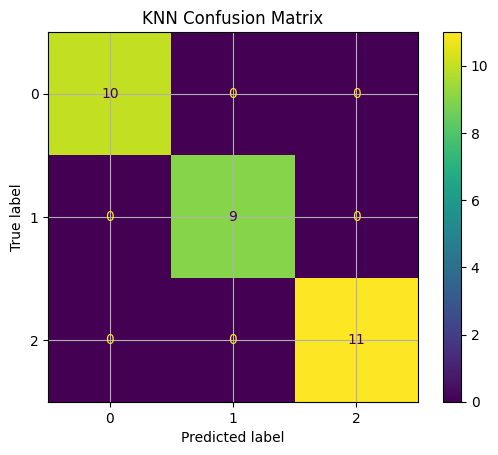

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.grid()
plt.show()

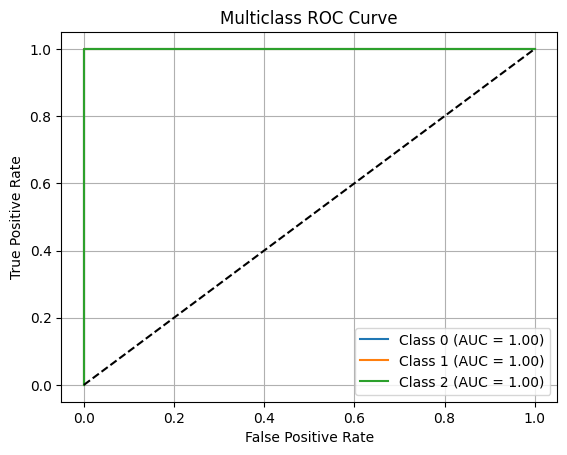

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Step 1: Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = knn_model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
# Step 2: Compute ROC curve and AUC for each class
for i in range(n_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
  roc_auc = auc(fpr, tpr)
  # Step 3: Plot
  plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.grid()
plt.show()

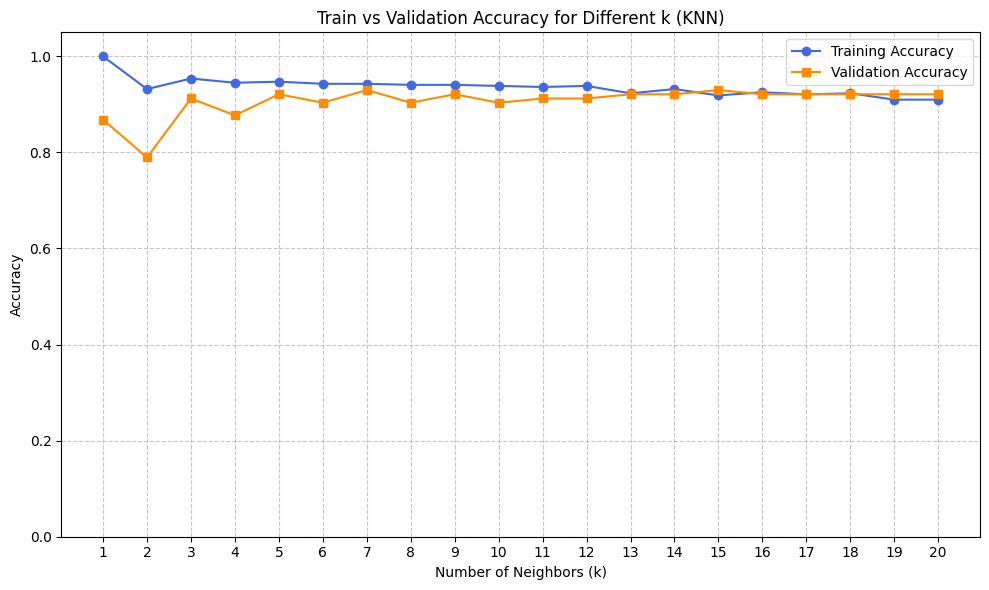

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Step 2: Add noise to features
np.random.seed(42)
noise = np.random.normal(loc=0.0, scale=0.5, size=X.shape)
X_noisy = X + noise
# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)
# Step 4: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
# Step 5: Train KNN for multiple k values
k_values = list(range(1, 21))
train_accuracies = []
val_accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracies.append(knn.score(X_train, y_train))
  val_accuracies.append(knn.score(X_test, y_test))
# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy', color='royalblue')
plt.plot(k_values, val_accuracies, marker='s', label='Validation Accuracy', color='darkorange')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy for Different k (KNN)')
plt.ylim(0.0, 1.05)  # Show full accuracy range from 0 to 1
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Analyze best and final accuracy results
import numpy as np

# Best validation accuracy and corresponding k
best_index = np.argmax(val_accuracies)
best_k = k_values[best_index]
best_val_acc = val_accuracies[best_index]

# Final values
final_train_acc = train_accuracies[-1]
final_val_acc = val_accuracies[-1]

print(f"✅ Best Validation Accuracy: {best_val_acc:.4f} at k = {best_k}")
print(f"📌 Final Training Accuracy (k={k_values[-1]}): {final_train_acc:.4f}")
print(f"📌 Final Validation Accuracy (k={k_values[-1]}): {final_val_acc:.4f}\n")

# Print all k values with corresponding accuracies
print("k | Train Acc | Val Acc")
print("-" * 25)
for i, k in enumerate(k_values):
    print(f"{k:2d} | {train_accuracies[i]:.4f}    | {val_accuracies[i]:.4f}")


✅ Best Validation Accuracy: 0.9298 at k = 7
📌 Final Training Accuracy (k=20): 0.9099
📌 Final Validation Accuracy (k=20): 0.9211

k | Train Acc | Val Acc
-------------------------
 1 | 1.0000    | 0.8684
 2 | 0.9319    | 0.7895
 3 | 0.9538    | 0.9123
 4 | 0.9451    | 0.8772
 5 | 0.9473    | 0.9211
 6 | 0.9429    | 0.9035
 7 | 0.9429    | 0.9298
 8 | 0.9407    | 0.9035
 9 | 0.9407    | 0.9211
10 | 0.9385    | 0.9035
11 | 0.9363    | 0.9123
12 | 0.9385    | 0.9123
13 | 0.9231    | 0.9211
14 | 0.9319    | 0.9211
15 | 0.9187    | 0.9298
16 | 0.9253    | 0.9211
17 | 0.9209    | 0.9211
18 | 0.9231    | 0.9211
19 | 0.9099    | 0.9211
20 | 0.9099    | 0.9211
